In [1]:
# https://www.kaggle.com/c/diabetic-retinopathy-detection/
# https://www.kaggle.com/tanlikesmath/diabetic-retinopathy-resized

In [2]:
# import glob
# import os
# from tqdm import tqdm
# import math
# from PIL import Image 
# files = glob.glob('D:\\Experiments with Deep Learning\\DR Kaggle\\train\\train\\train\\*.jpeg')

# new_width = 1024

# for i in tqdm(range(len(files))):
#     img = Image.open(files[i])
#     width,height = img.size
#     ratio = height/width
#     if width > new_width:
#         new_image = img.resize((new_width,math.ceil(ratio*new_width)))   
#     else:
#         new_image = img
#     new_image.save('D:\\Experiments with Deep Learning\\DR 

In [11]:
import pandas as pd
import numpy as np
import os
from PIL import Image as PILImage
%matplotlib inline
from IPython.display import display, Image

In [12]:
df = pd.read_csv('../datasets/trainLabels.csv')

In [13]:
df.groupby(["level"]).count()

,image
level,
0,25810
1,2443
2,5292
3,873
4,708


<AxesSubplot:xlabel='level'>

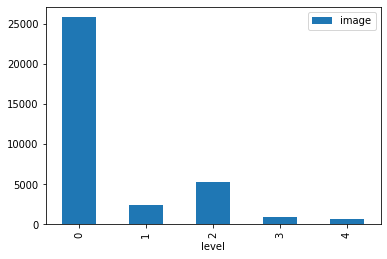

In [14]:
df.groupby(["level"]).count().plot(kind='bar')

0 - No DR
1 - Mild
2 - Moderate
3 - Severe
4 - Proliferative DR

Images are labeled with a subject id as well as either left or right (e.g. 1_left.jpeg is the left eye of patient id 1).

In [15]:
df['patient_id'] = df.image.apply(lambda x : x.split("_")[0])
df['eye'] = df.image.apply(lambda x : x.split("_")[1])

In [16]:
df

,image,level,patient_id,eye
0,10_left,0,10,left
1,10_right,0,10,right
2,13_left,0,13,left
3,13_right,0,13,right
4,15_left,1,15,left
...,...,...,...,...
35121,44347_right,0,44347,right
35122,44348_left,0,44348,left
35123,44348_right,0,44348,right
35124,44349_left,0,44349,left


In [17]:
df.groupby(["eye"])['image'].count()

eye
left     17563
right    17563
Name: image, dtype: int64

<AxesSubplot:xlabel='eye'>

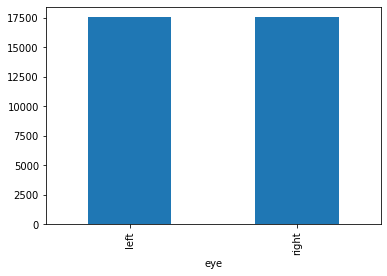

In [18]:
df.groupby(["eye"])['image'].count().plot(kind="bar")

In [29]:
df['path'] = df['image'].apply(lambda image:"../datasets/resized_train/"+image+".jpeg")

In [30]:
df

,image,level,patient_id,eye,path
0,10_left,0,10,left,../datasets/resized_train/10_left.jpeg
1,10_right,0,10,right,../datasets/resized_train/10_right.jpeg
2,13_left,0,13,left,../datasets/resized_train/13_left.jpeg
3,13_right,0,13,right,../datasets/resized_train/13_right.jpeg
4,15_left,1,15,left,../datasets/resized_train/15_left.jpeg
...,...,...,...,...,...
35121,44347_right,0,44347,right,../datasets/resized_train/44347_right.jpeg
35122,44348_left,0,44348,left,../datasets/resized_train/44348_left.jpeg
35123,44348_right,0,44348,right,../datasets/resized_train/44348_right.jpeg
35124,44349_left,0,44349,left,../datasets/resized_train/44349_left.jpeg


In [35]:
df['exists'] = df.path.apply(lambda x:os.path.exists(x))

In [37]:
df.shape

(35126, 6)

In [38]:
df[df.exists].shape

(35126, 6)

## All file exists